

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 




Independent Variables:

- Loan_ID


- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

In [1]:
#Lets load the dataset
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 13)

So, Here we have 614 Rows and Columns.

In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#Lets check for isnull
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, Here we have null values in few columns.

In [5]:
#Lets check total sum of null values
data.isna().sum().sum()

149

So, we 149 Null values . We have to treat them by using Z score.

In [6]:
#Lets check for Duplicates 
data.duplicated().sum()

0

So, here we dont have duplicates value we are to proceed to our EDA part

In [7]:
# Before any analysis, let's convert the target column into numerical classes.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2 = lab_enc.fit_transform(data['Loan_Status'])
pd.Series(df2)
data['Loan_Status']=df2
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


Here we change 


Yes to 1 and No to 0 

By Using Encoding Technique..

In [8]:
#Lets treat null value to go ahead in Data Visualization Part.
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [9]:
#Lets impute the Loan Ammount
from sklearn.impute  import KNNImputer

In [10]:
knn_imp=KNNImputer(n_neighbors=2)
knn_imp=pd.DataFrame(knn_imp.fit_transform(data[["LoanAmount"]]))

knn_imp

,0
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [11]:
data['LoanAmount']=knn_imp
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [12]:
#Lets check for null again.
data.isna().sum().sum()

0

So , Here treated all null values . and we are good to proceed to a EDA.

# EDA -> Exploratory Data Analysis

In [13]:
#Lets import DataVisualization Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

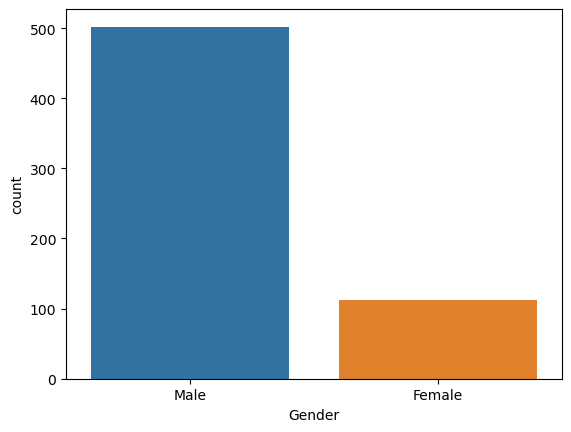

Male      502
Female    112
Name: Gender, dtype: int64

In [14]:
#Lets plot Gender 
sns.countplot(x='Gender',data=data)
plt.show()
data.Gender.value_counts()

So ,Here we have

Male - 502

Female - 112

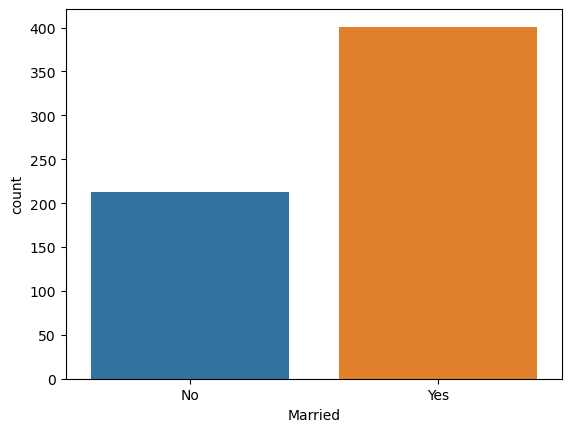

Yes    401
No     213
Name: Married, dtype: int64

In [15]:
#Lets plot Married
sns.countplot(x='Married',data=data)
plt.show()
data.Married.value_counts()

So, Here we 401 People are Married and 213 are Unmarried

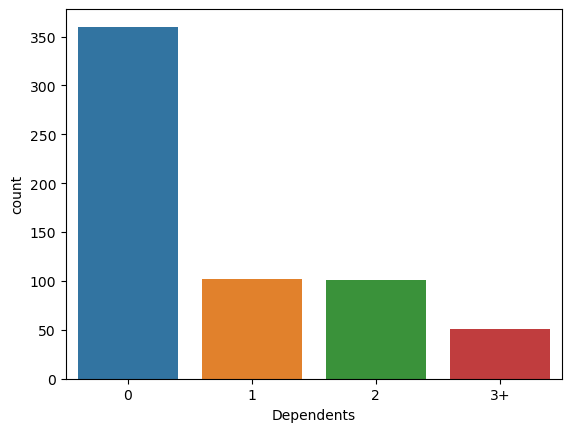

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
#Lets plot for Dependents
sns.countplot(x='Dependents',data=data)
plt.show()
data.Dependents.value_counts()

Maximum have 0 dependents .


1 -  102 Dependents


2 - 101 Dependents

3+ - Dependents

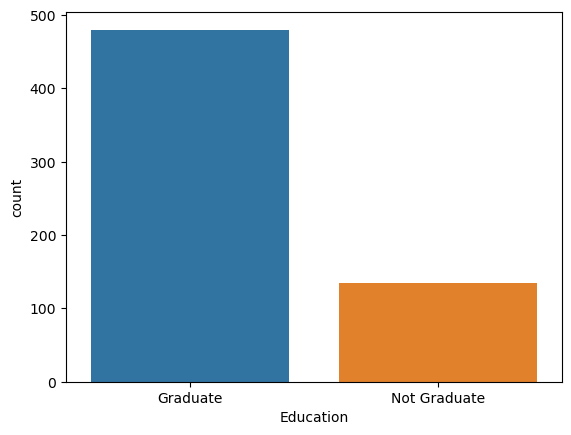

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
#Lets plot Education
sns.countplot(x='Education',data=data)
plt.show()
data.Education.value_counts()

Here we can see that.


Graduate        480


Not Graduate    134

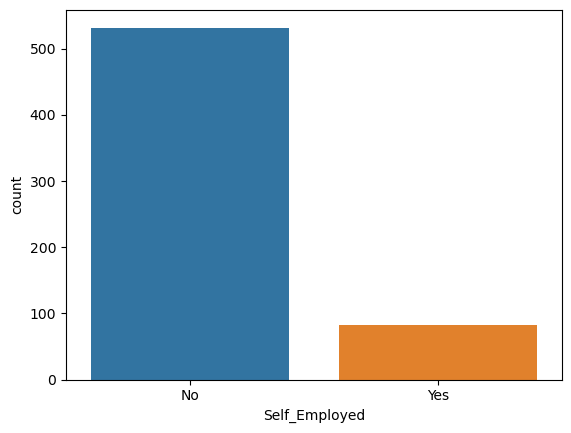

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
#Lets plot for Self_Employed
sns.countplot(x='Self_Employed',data=data)
plt.show()
data.Self_Employed.value_counts()

Maximum people are not self employed..

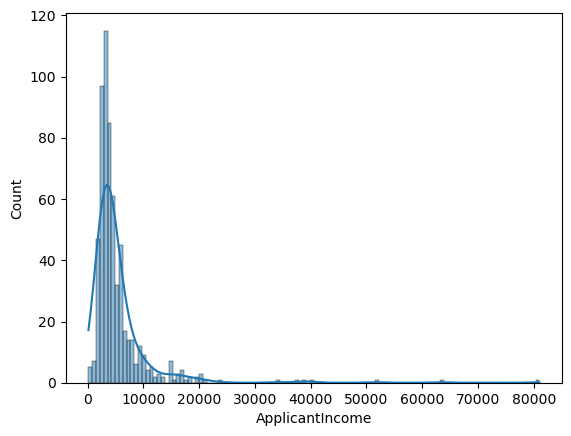

In [19]:
#Lets plot ApplicantIncome
sns.histplot(x='ApplicantIncome',data=data,kde=True)
plt.show()

Maximum people earning 10000 . and its distribution is Right Skewed.

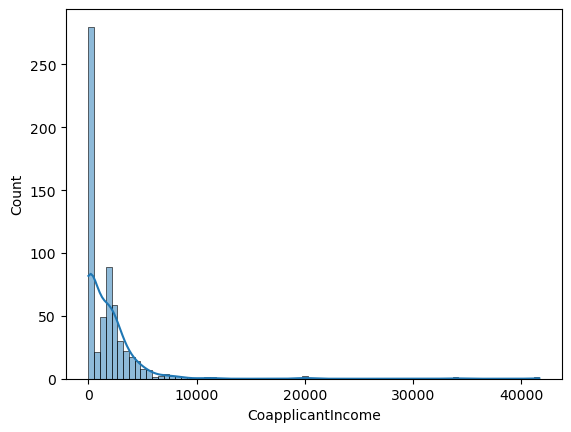

In [20]:
#Lets plot for CoapplicantIncome ( guarantor)
sns.histplot(x='CoapplicantIncome',data=data,kde=True)
plt.show()

Maximum  guarantor are not earning . and distribution is right skewed.

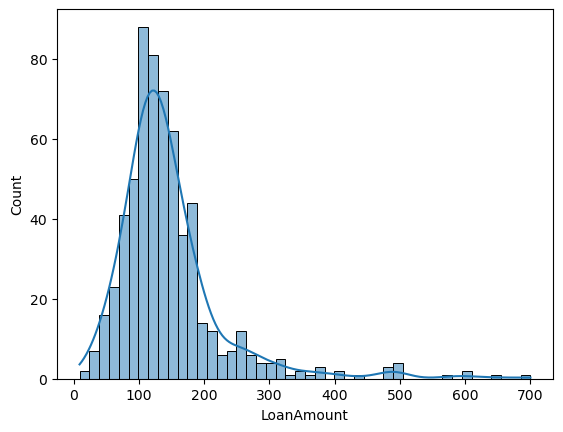

In [21]:
#Lets plot for LoanAmount
sns.histplot(x='LoanAmount',data=data,kde=True)
plt.show()

Maximum loan is taking about 100 and Distribution and Right skewed. But we dont have to forget all amount can be take as a load like 400,500,600,700.

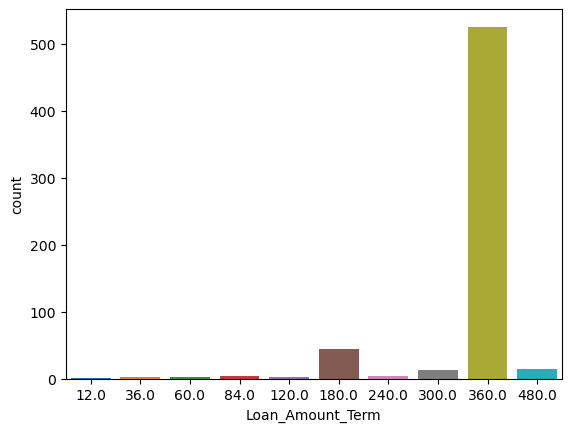

In [22]:
#Lets plot Loan_Amount_Term
sns.countplot(x='Loan_Amount_Term',data=data)
plt.show()

Maximum loan is take for 360 days ..

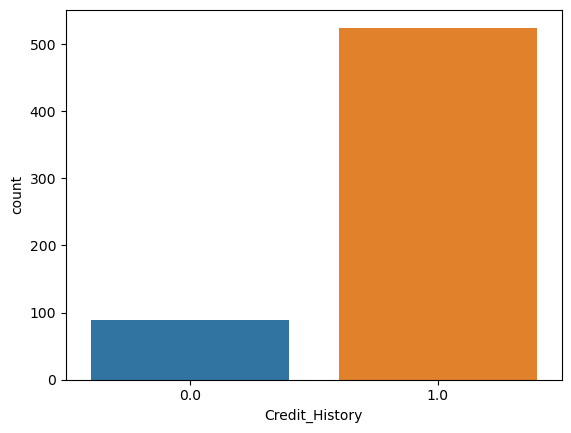

In [23]:
#Lets plot credit History
sns.countplot(x="Credit_History",data=data)
plt.show()

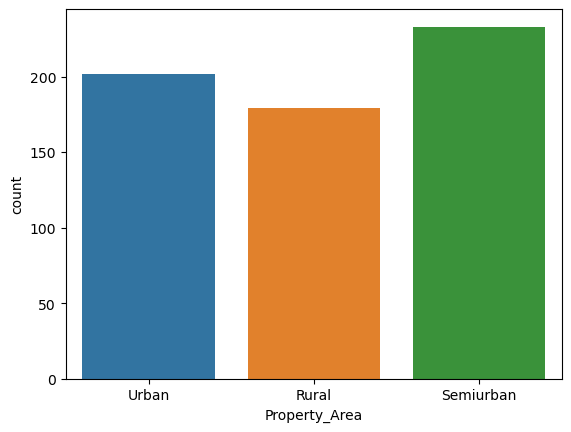

In [24]:
#Lets plot Property_Area
sns.countplot(x='Property_Area',data=data)
plt.show()

Maximum loan taking from Semiurban and then Urban and then Rural.

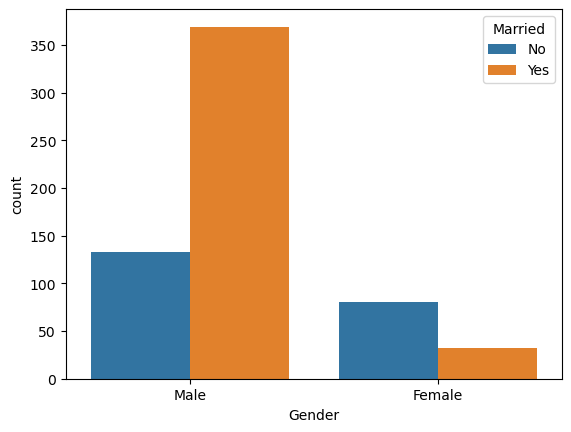

In [25]:
#Lets plot Married and Gender
sns.countplot(data['Gender'], hue=data['Married'])
plt.show()

Maximum male are married .

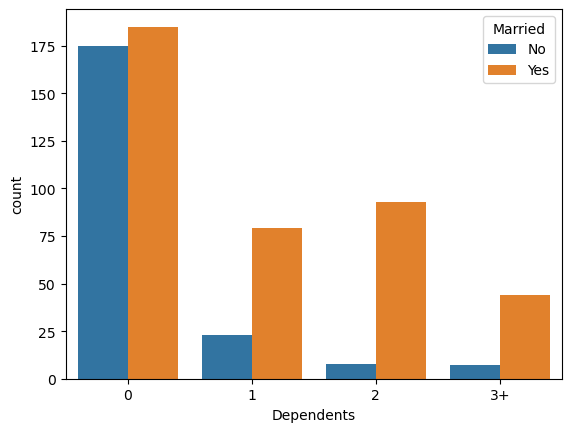

In [26]:
#Lets plot Dependents and Married
sns.countplot(data['Dependents'],hue=data['Married'])
plt.show()

Married have more dependents


# Bivarient Exploratory data Analysis

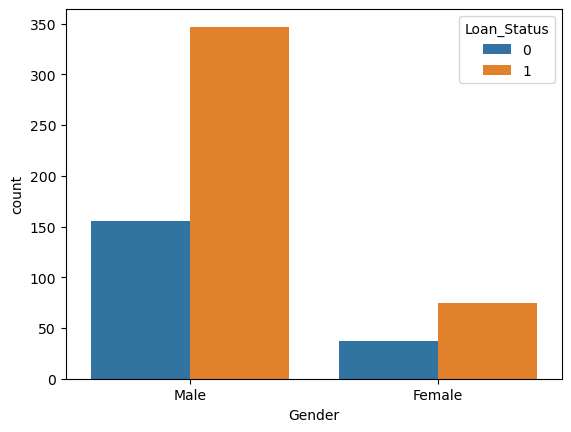

In [27]:
sns.countplot(data['Gender'],hue=data['Loan_Status'], data=data)
plt.show()

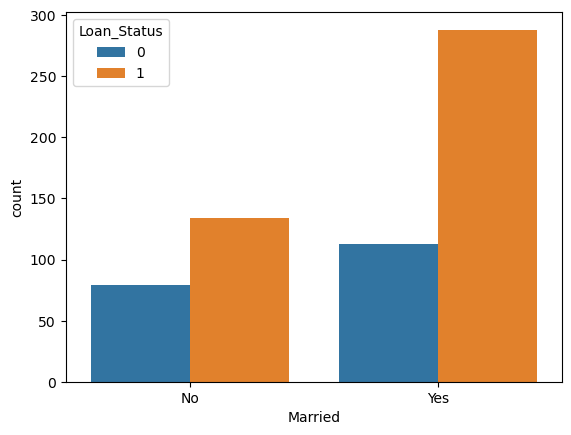

In [28]:
#Lets plot for Married vs Loan
sns.countplot(data['Married'],hue=data['Loan_Status'])
plt.show()

Maximum loan taking from Married .

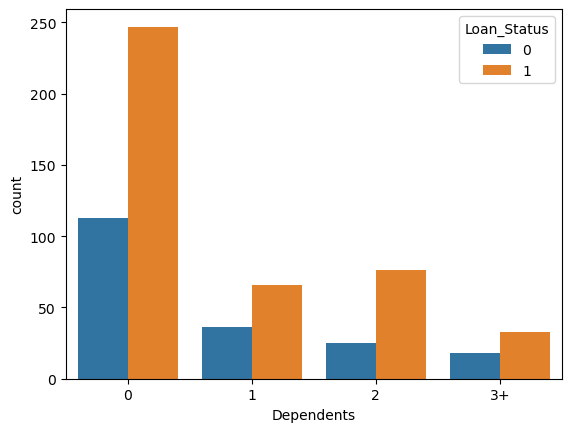

In [29]:
#Lets plot Dependents vs Loan
sns.countplot(data['Dependents'],hue='Loan_Status', data=data)
plt.show()

Majority of the population have 0 dependent and are accepted for loan

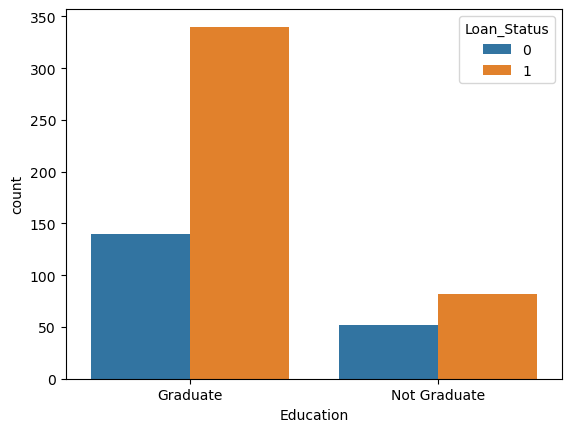

In [30]:
#Lets plot Education vs Loan
sns.countplot('Education',hue='Loan_Status', data=data)
plt.show()

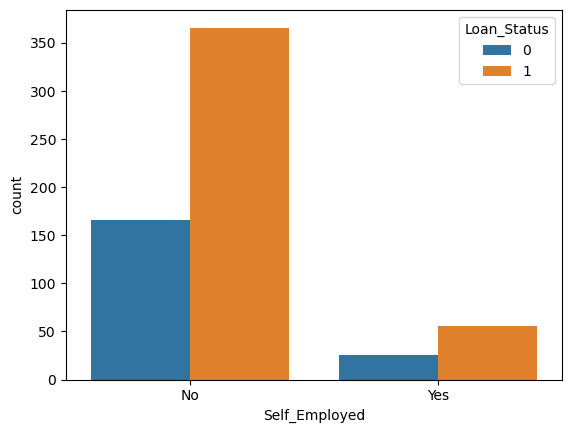

In [31]:
#Lets plot for Self_Employed vs Loan
sns.countplot('Self_Employed',hue='Loan_Status',data=data)
plt.show()

In [32]:
data.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True,dropna=False)

Self_Employed  Loan_Status
No             1              0.687970
               0              0.312030
Yes            1              0.682927
               0              0.317073
Name: Loan_Status, dtype: float64

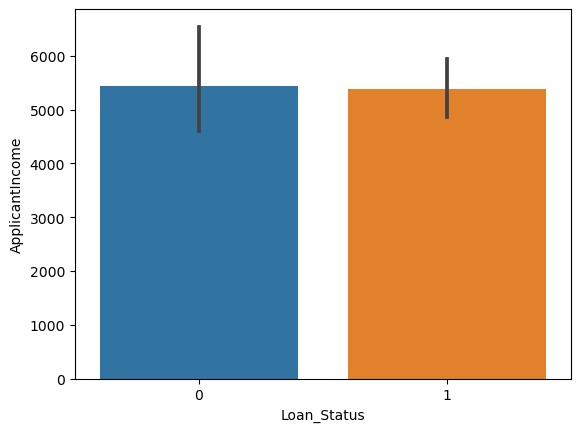

In [33]:
#Lets plot for Loan_Status and ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome', data=data)
plt.show()

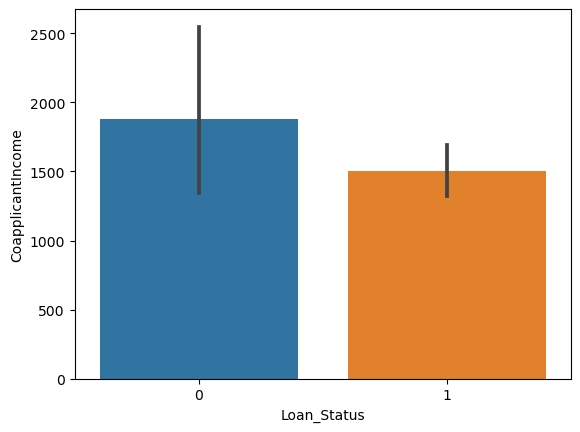

In [34]:
#lets plot for CoapplicantIncome vs Loan
sns.barplot(x='Loan_Status',y='CoapplicantIncome', data=data)
plt.show()

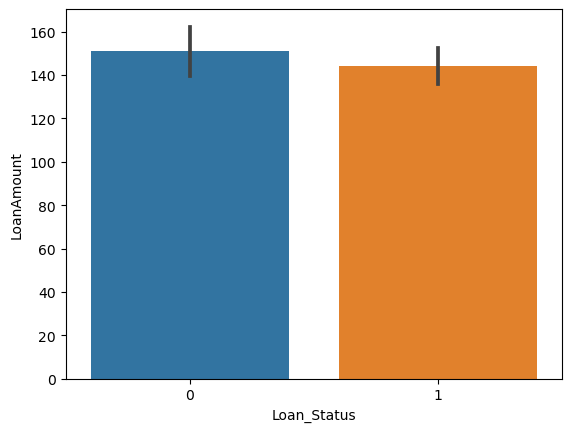

In [35]:
#Lets plot for LoanAmount vs Loan_status
sns.barplot(y=data['LoanAmount'],x=data['Loan_Status'])
plt.show()

Nothing significant information is available

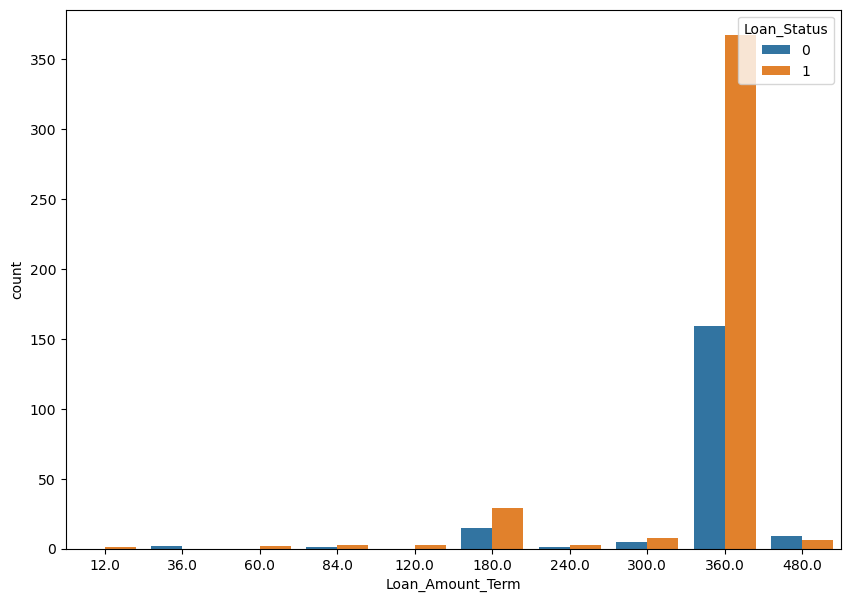

In [36]:
#Lets plot for Loan_Amount_Term and Loan_Status
plt.figure(figsize=(10,7))
sns.countplot(data['Loan_Amount_Term'],hue='Loan_Status',data=data)
plt.show()

Majority loan was asked for 30yr, Mostly was approved.


If loan was asked for 40 years, chances are high for rejection

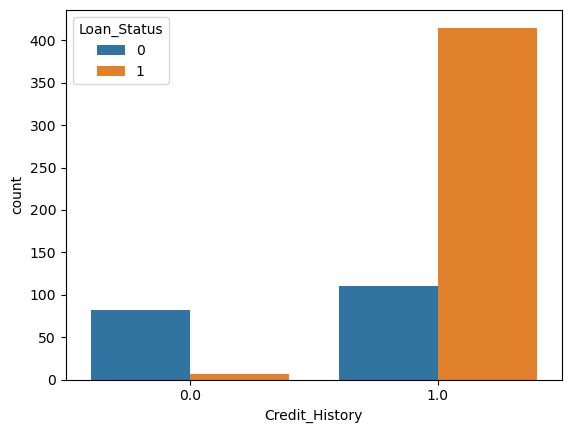

In [37]:
#Lets plot for Credit_History vs Loan
sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
plt.show()

If Credit history is available, Chances your loan will approve

In [38]:
data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True,dropna=False)

Credit_History  Loan_Status
0.0             0              0.921348
                1              0.078652
1.0             1              0.790476
                0              0.209524
Name: Loan_Status, dtype: float64

If Credit History is availabe, 80% chances for approved loan

If credit History is not available, 92% chances for loan rejection

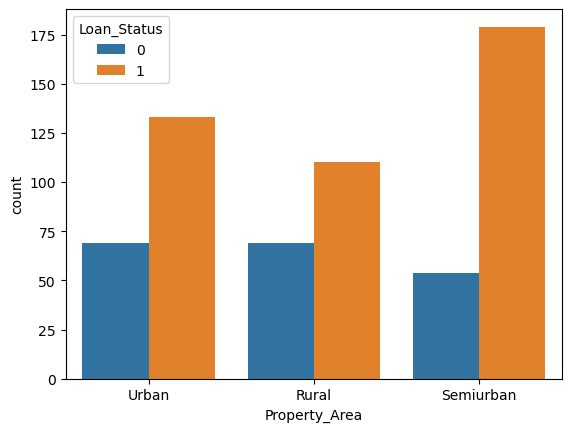

In [39]:
# Lets plot for Property_Area vs Loan
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
plt.show()

# Multivarient EDA

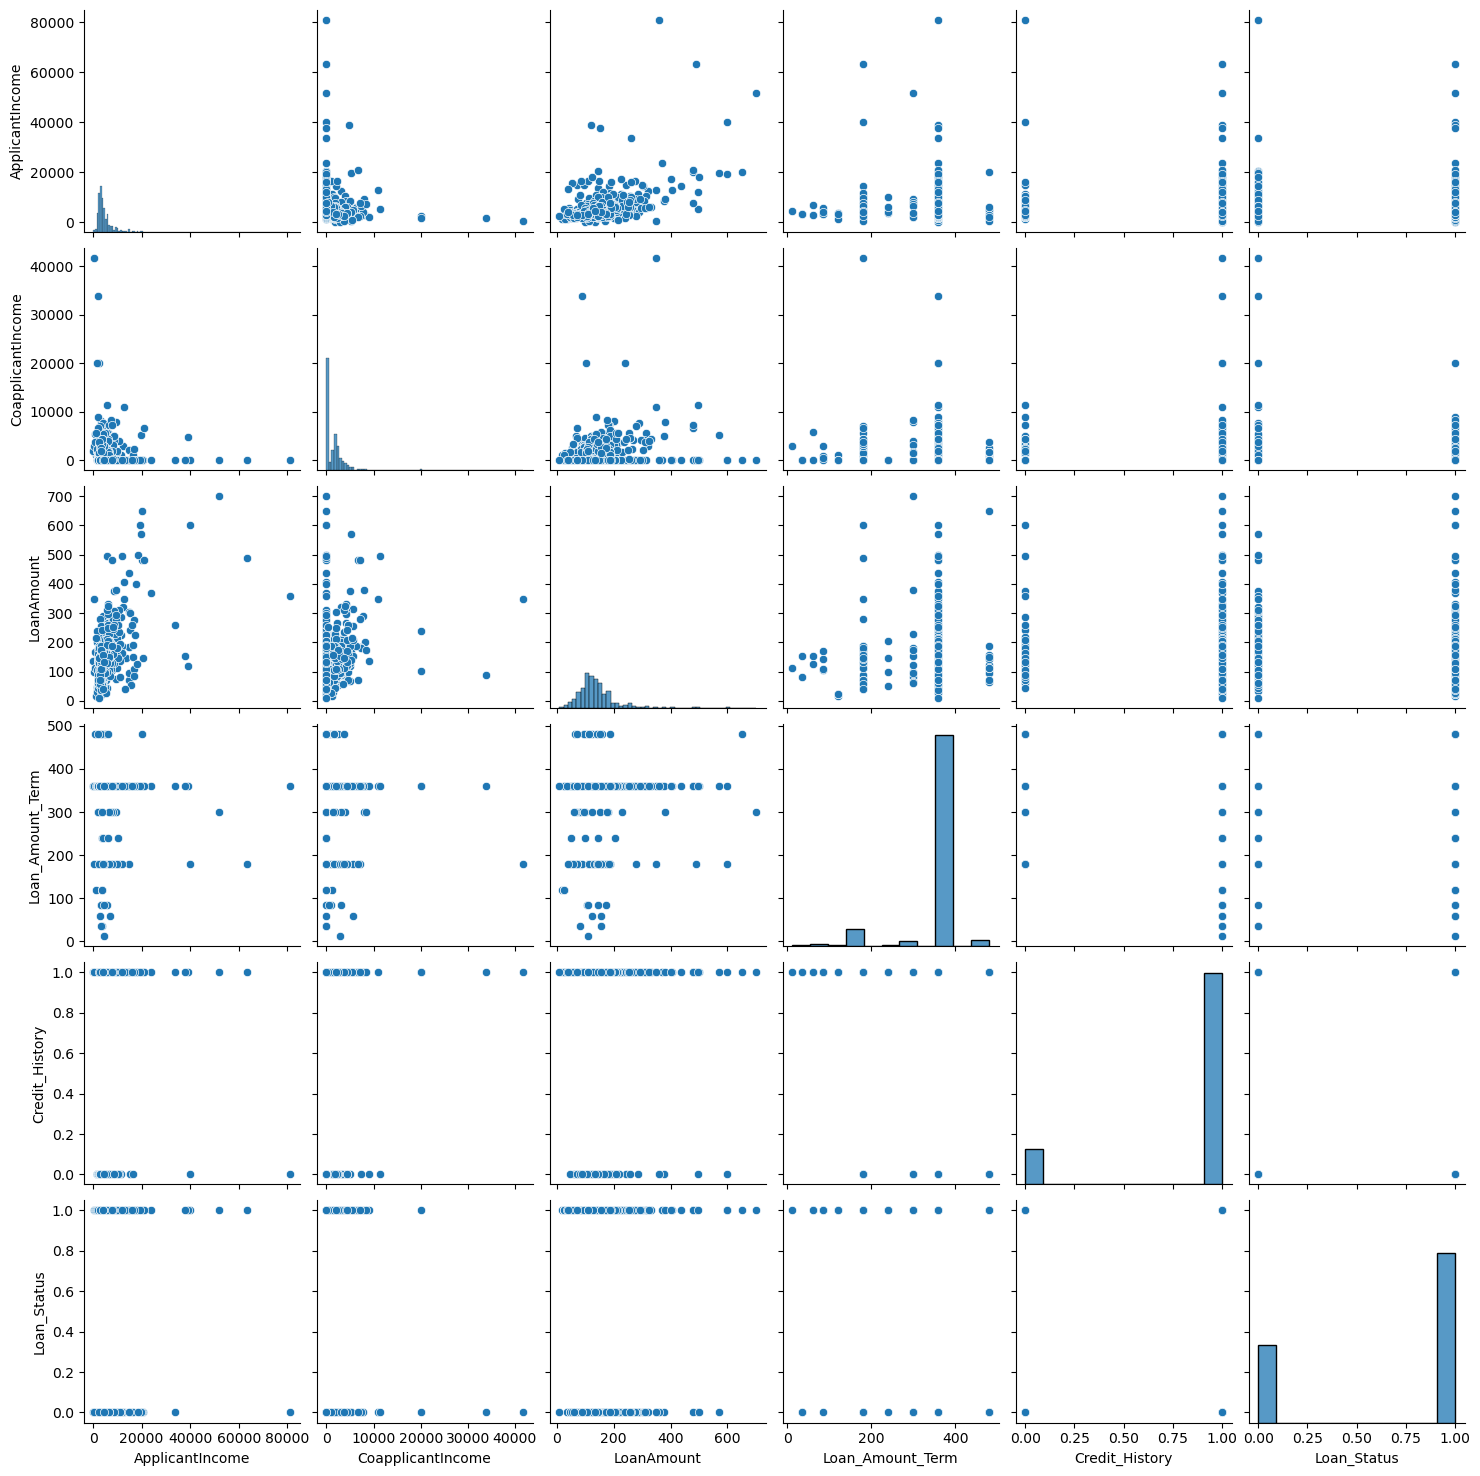

In [40]:
sns.pairplot(data)
plt.show()


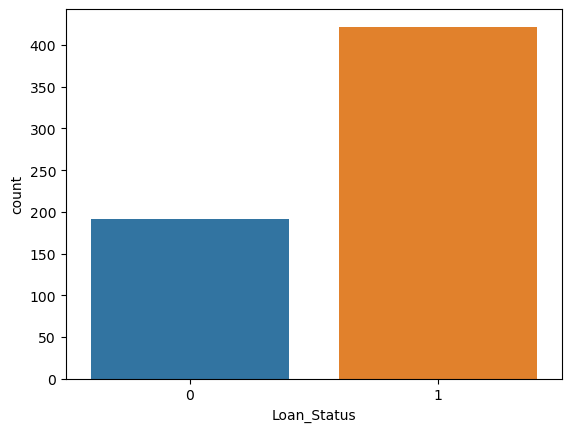

In [41]:
#Lets plot Loan_Status
sns.countplot(x='Loan_Status',data=data)
plt.show()

Here we can find our Targer column is imbalanced we to balance the target data. 

In [42]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


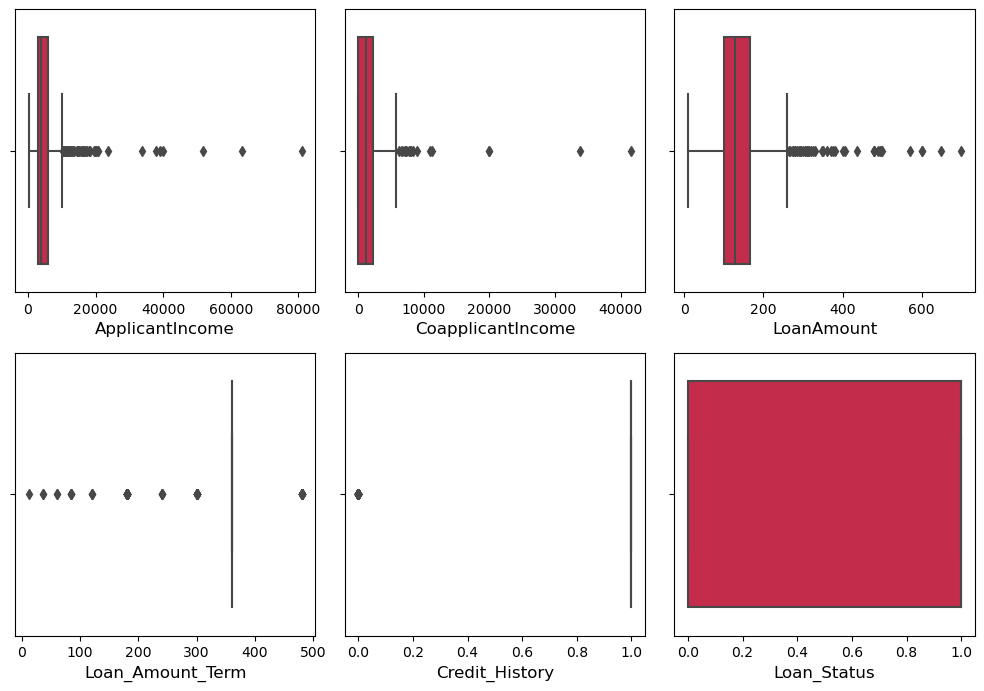

In [43]:
#Lets check for outliers.
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


If we ignore the Target column . We can see that ApplicantIncome , CoapplicantIncome , LoanAmount , Loan_Amount_Term . have outliers. We have to remove using Z score Method

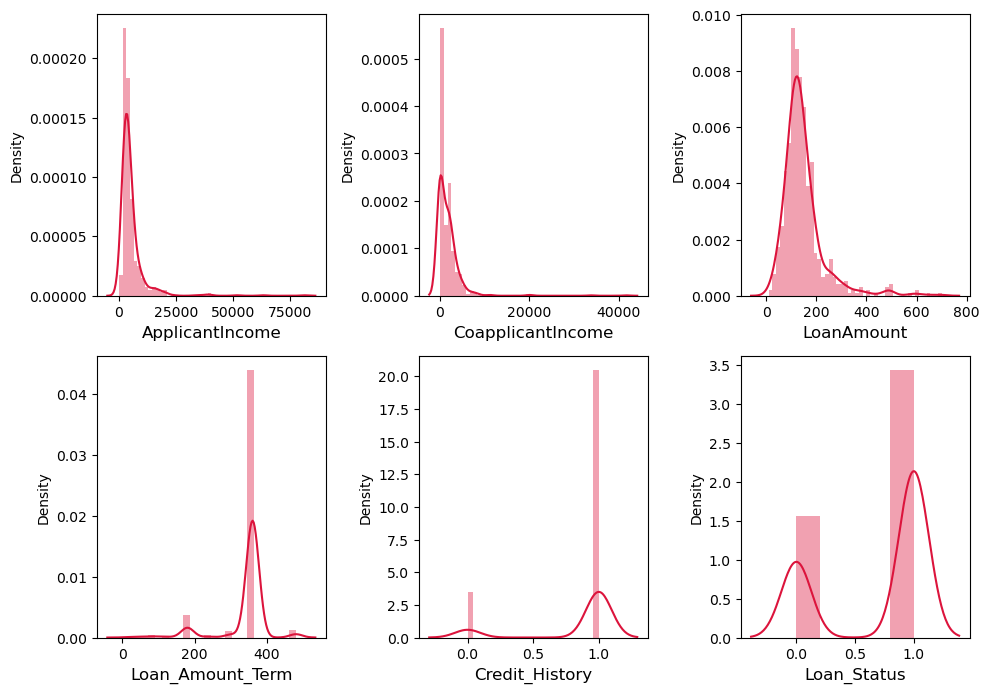

In [44]:
#Lets check for distribution.
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


So , Here we can see that .ApplicantIncome , CoapplicantIncome ,LoanAmount ,Loan_Amount_Term are skewed .

# Encoding the categorical columns using Label Encoding

In [45]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [46]:
categorical_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data[categorical_col]= data[categorical_col].apply(LE.fit_transform)

In [48]:
#Lets check how data is looking
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [49]:
#Lets check for datatypes 
data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

So, Here we confirm that . We converted all the values in Numeric columns.

# Correlation between the target variable and features using HEAT map

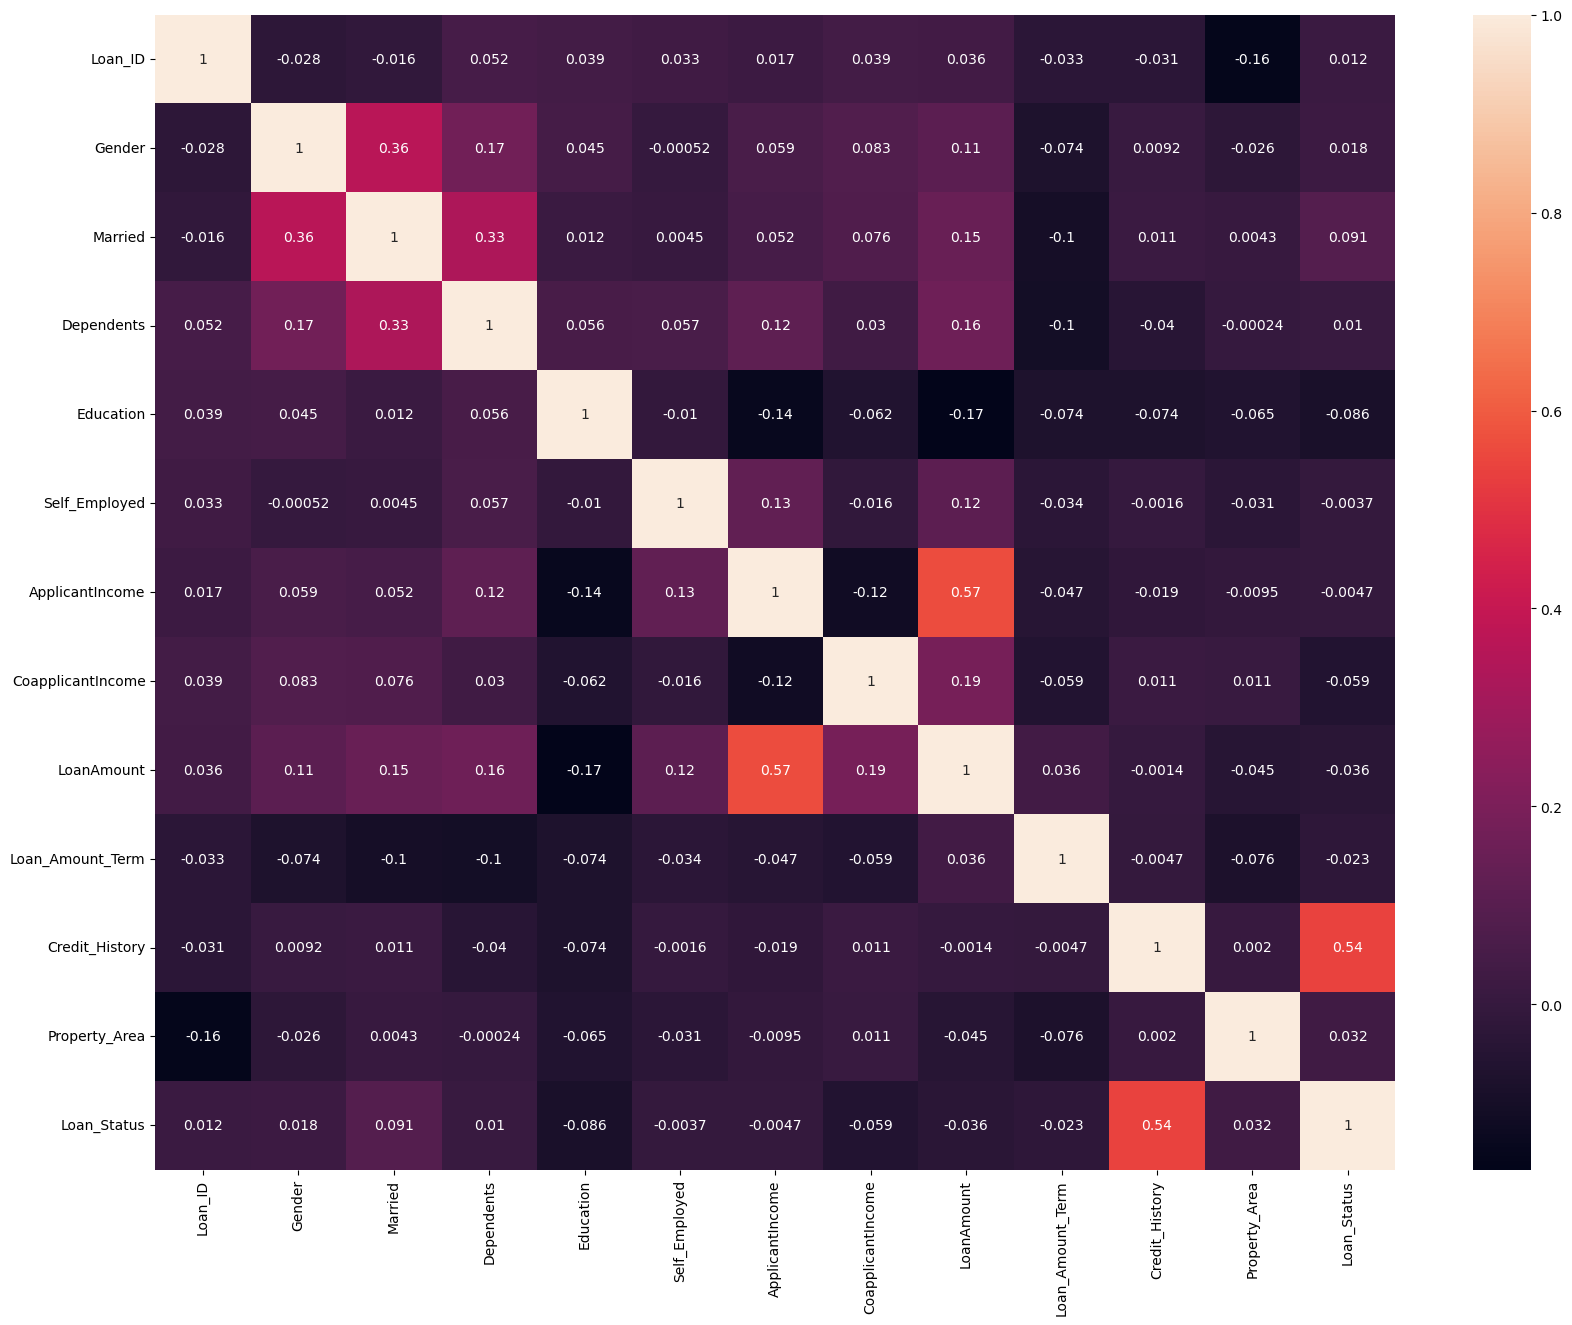

In [50]:
# Checking the correlation between features and the target
cor = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()


- ApplicantIncome  and LoanAmount have 57 % relation 
- Credit_History and Loan_Status have 54 % relation
- Married and Dependents have have 33% relation
- Gender and Married have 36 % relation.


Here we can see that we have one useless column . we have to remove this. Loan_ID


In [51]:
data.drop(columns='Loan_ID',inplace=True)

# Visualizing the correlation between label(primary_fuel) and features using bar plot

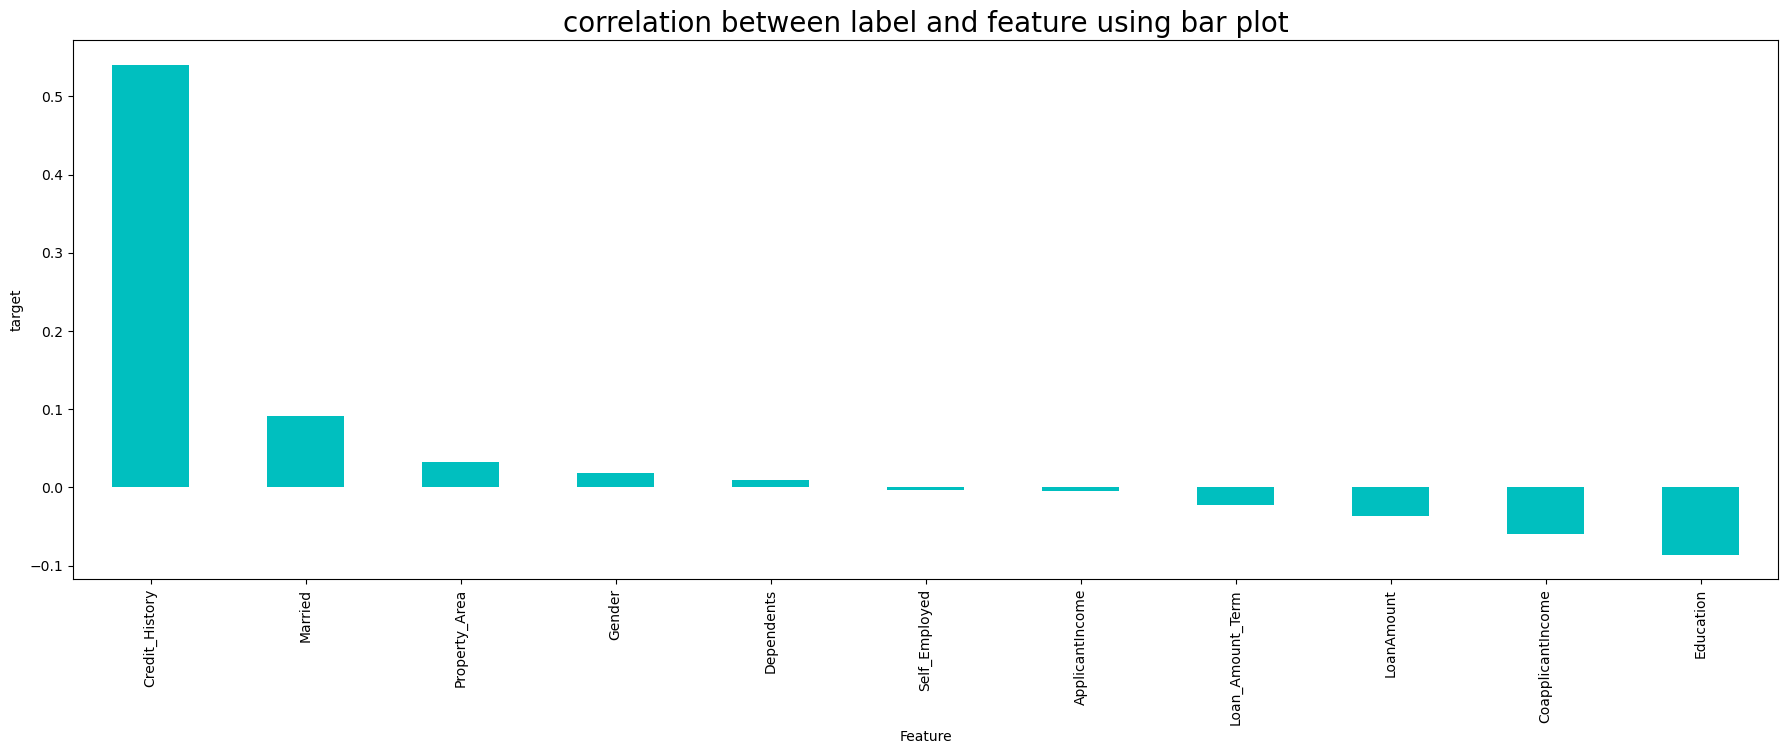

In [52]:
plt.figure(figsize=(22,7))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


- Credit_History and our Targer Variable have good Positive Correlation.


-  Education and our Target Varibale have some Negative Relation .

#  Prediction 

In [53]:
x = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]


# Checking for skewness

In [54]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

Here we set threshold for skewness is -+0.5 .
- And we can see that we dont have any one column which have skewness free. we have to treat them using power transformer. we can only select numeric columns


# Removing skewness using yeo_johnson method

In [55]:
skew = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [57]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.544331,-1.102837,0.235387,0.17554,0.411733
1,0.170974,0.750578,-0.037659,0.17554,0.411733
2,-0.499955,-1.102837,-1.346305,0.17554,0.411733
3,-0.743873,0.891686,-0.167886,0.17554,0.411733
4,0.582817,-1.102837,0.158610,0.17554,0.411733


In [58]:
# Checking skewness after using yeo-johnson ethod
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

Now we have removed the skewness in all the numerical columns

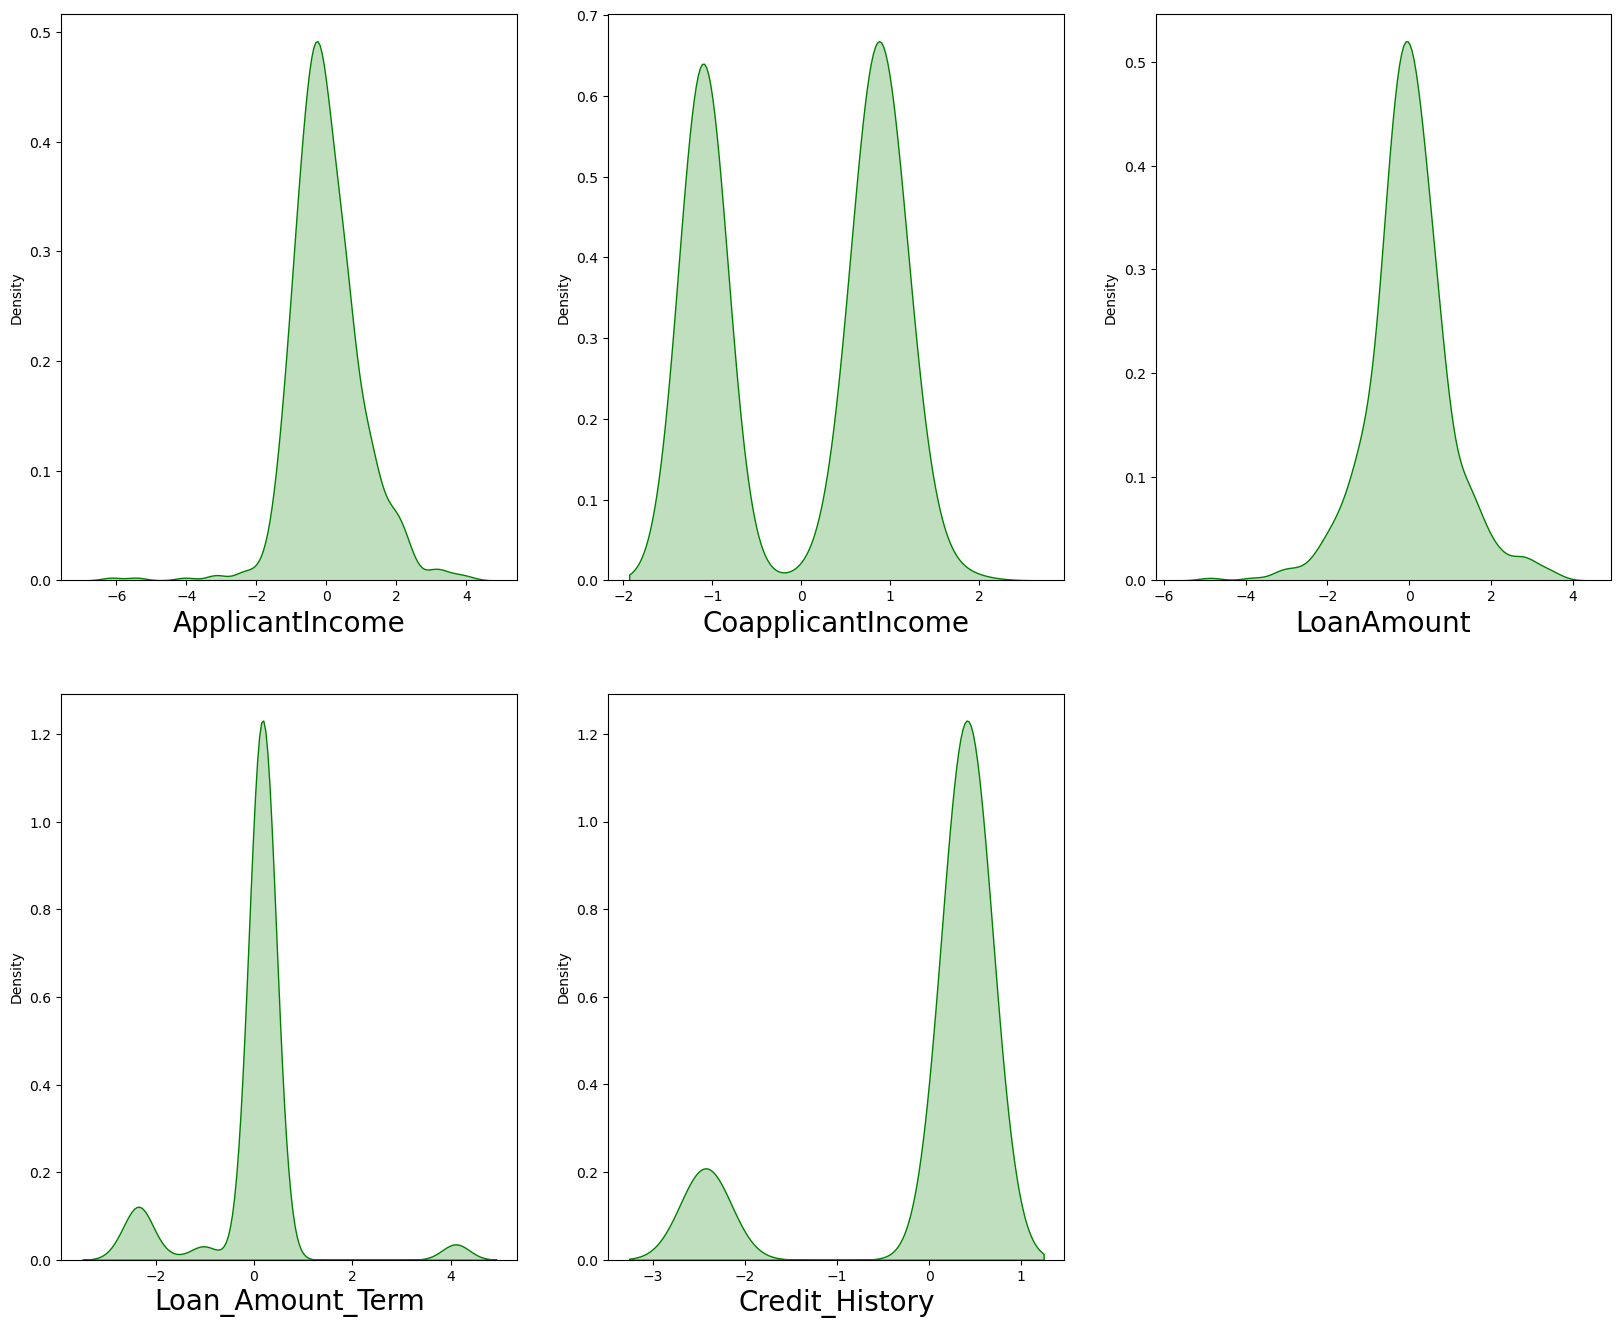

In [59]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Resolving the class imbalance issue in label column

In [60]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [61]:
# adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y= oversample.fit_resample(x,y)


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [62]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.518819,-1.188036,-0.684624,-0.491097,-0.347635,0.531172,-1.059372,0.206188,0.146152,0.551842,1.286908
1,0.518819,0.841726,0.350900,-0.491097,-0.347635,0.151298,0.786989,-0.068503,0.146152,0.551842,-1.212862
2,0.518819,0.841726,-0.684624,-0.491097,2.876582,-0.531343,-1.059372,-1.385039,0.146152,0.551842,1.286908
3,0.518819,0.841726,-0.684624,2.036257,-0.347635,-0.779518,0.927560,-0.199516,0.146152,0.551842,1.286908
4,0.518819,-1.188036,-0.684624,-0.491097,-0.347635,0.570329,-1.059372,0.128948,0.146152,0.551842,1.286908


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Checking VIF values

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.239802,Gender
1,1.489223,Married
2,1.196872,Dependents
3,1.051986,Education
4,1.036967,Self_Employed
5,1.913852,ApplicantIncome
6,1.653388,CoapplicantIncome
7,1.669914,LoanAmount
8,1.031664,Loan_Amount_Term
9,1.010001,Credit_History


So here we set threshold for 10 . There is no multicollinearity  probelm we are good to build a model.

# Lets Build Model

In [65]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier()

In [66]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.8284023668639053
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.88      0.77      0.82        86
           1       0.79      0.89      0.84        83

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169

 At random state 0 , the Confusion matrix is :- [[66 20]
 [ 9 74]]


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.7928994082840237
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.82      0.80      0.81        93
           1       0.76      0.79      0.77        76

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [68]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
#write one fucntion and call as many times to check accuracy_score of different models 

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [70]:
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.8047337278106509
Classification Report==>                precision    recall  f1-score   support

           0       0.81      0.78      0.80        83
           1       0.80      0.83      0.81        86

    accuracy                           0.80       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.80      0.80      0.80       169

Confusion Matrix==>  [[65 18]
 [15 71]]
Cross Validation Score: 81.51803324880248


# Finding best random state for building LogisticRegression Models

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [72]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7525925925925926
 At random state 0 , the testing accuracy is :- 0.7041420118343196
 At random state 0 , the testing accuracy is :- [[51 35]
 [15 68]]


 At random state 1 , the testing accuracy is :- 0.7511111111111111
 At random state 1 , the testing accuracy is :- 0.6804733727810651
 At random state 1 , the testing accuracy is :- [[54 39]
 [15 61]]


 At random state 2 , the testing accuracy is :- 0.7525925925925926
 At random state 2 , the testing accuracy is :- 0.7218934911242604
 At random state 2 , the testing accuracy is :- [[57 28]
 [19 65]]


 At random state 3 , the testing accuracy is :- 0.7481481481481481
 At random state 3 , the testing accuracy is :- 0.727810650887574
 At random state 3 , the testing accuracy is :- [[52 29]
 [17 71]]


 At random state 4 , the testing accuracy is :- 0.7407407407407407
 At random state 4 , the testing accuracy is :- 0.7633136094674556
 At random state 4 , the testing accuracy is :- [[61 24

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=83)

In [74]:
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.7362962962962963
======================Testing Score====================
Accuracy Score==>   0.7810650887573964
Classification Report==>                precision    recall  f1-score   support

           0       0.88      0.64      0.74        83
           1       0.72      0.92      0.81        86

    accuracy                           0.78       169
   macro avg       0.80      0.78      0.78       169
weighted avg       0.80      0.78      0.78       169

Confusion Matrix==>  [[53 30]
 [ 7 79]]
Cross Validation Score: 71.80332488024796


# Finding best random state for building KNeighborsClassifier Models

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8251851851851851
 At random state 0 , the testing accuracy is :- 0.7514792899408284
 At random state 0 , the testing accuracy is :- [[62 24]
 [18 65]]


 At random state 1 , the testing accuracy is :- 0.8281481481481482
 At random state 1 , the testing accuracy is :- 0.7100591715976331
 At random state 1 , the testing accuracy is :- [[67 26]
 [23 53]]


 At random state 2 , the testing accuracy is :- 0.8074074074074075
 At random state 2 , the testing accuracy is :- 0.757396449704142
 At random state 2 , the testing accuracy is :- [[60 25]
 [16 68]]


 At random state 3 , the testing accuracy is :- 0.8281481481481482
 At random state 3 , the testing accuracy is :- 0.7218934911242604
 At random state 3 , the testing accuracy is :- [[60 21]
 [26 62]]


 At random state 4 , the testing accuracy is :- 0.8222222222222222
 At random state 4 , the testing accuracy is :- 0.7633136094674556
 At random state 4 , the testing accuracy is :- [[62 23

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [79]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8059259259259259
======================Testing Score====================
Accuracy Score==>   0.8579881656804734
Classification Report==>                precision    recall  f1-score   support

           0       0.89      0.80      0.84        79
           1       0.84      0.91      0.87        90

    accuracy                           0.86       169
   macro avg       0.86      0.85      0.86       169
weighted avg       0.86      0.86      0.86       169

Confusion Matrix==>  [[63 16]
 [ 8 82]]
Cross Validation Score: 73.46153846153847


In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [81]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.7337278106508875
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.75      0.71      0.73        86
           1       0.72      0.76      0.74        83

    accuracy                           0.73       169
   macro avg       0.73      0.73      0.73       169
weighted avg       0.73      0.73      0.73       169

 At random state 0 , the Confusion matrix is :- [[61 25]
 [20 63]]


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.757396449704142
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.80      0.75      0.77        93
           1       0.72      0.76      0.74        76

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
w

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

In [83]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.7455621301775148
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.78      0.74        80
           1       0.78      0.72      0.75        89

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169

Confusion Matrix==>  [[62 18]
 [25 64]]
Cross Validation Score: 74.8795435333897


# Lets try With GradientBoostingClassifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [86]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    gbdt.fit(x_train,y_train)
    x_pred=gbdt.predict(x_train)
    y_pred=gbdt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8770370370370371
 At random state 0 , the testing accuracy is :- 0.757396449704142
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.83      0.66      0.74        86
           1       0.71      0.86      0.78        83

    accuracy                           0.76       169
   macro avg       0.77      0.76      0.76       169
weighted avg       0.77      0.76      0.76       169

 At random state 0 , the Confusion matrix is :- [[57 29]
 [12 71]]


 At random state 1 , the testing accuracy is :- 0.8903703703703704
 At random state 1 , the testing accuracy is :- 0.7396449704142012
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.83      0.67      0.74        93
           1       0.67      0.83      0.74        76

    accuracy                           0.74       169
   macro avg       0.75  

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

In [88]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [89]:
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8918518518518519
======================Testing Score====================
Accuracy Score==>   0.8165680473372781
Classification Report==>                precision    recall  f1-score   support

           0       0.85      0.75      0.79        80
           1       0.80      0.88      0.83        89

    accuracy                           0.82       169
   macro avg       0.82      0.81      0.81       169
weighted avg       0.82      0.82      0.82       169

Confusion Matrix==>  [[60 20]
 [11 78]]
Cross Validation Score: 76.8970132431671


# Lets try with SVM 

In [90]:
from sklearn.svm import SVC 
svc=SVC()

In [91]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svc.fit(x_train,y_train)
    x_pred=svc.predict(x_train)
    y_pred=svc.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8059259259259259
 At random state 0 , the testing accuracy is :- 0.7337278106508875
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.84      0.59      0.69        86
           1       0.68      0.88      0.76        83

    accuracy                           0.73       169
   macro avg       0.76      0.74      0.73       169
weighted avg       0.76      0.73      0.73       169

 At random state 0 , the Confusion matrix is :- [[51 35]
 [10 73]]


 At random state 1 , the testing accuracy is :- 0.8103703703703704
 At random state 1 , the testing accuracy is :- 0.6923076923076923
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.78      0.61      0.69        93
           1       0.62      0.79      0.70        76

    accuracy                           0.69       169
   macro avg       0.70 

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [93]:
svc.fit(x_train,y_train)

SVC()

In [94]:
metrics_score(svc,x_train,x_test,y_train,y_test,train=True)
metrics_score(svc,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.802962962962963
======================Testing Score====================
Accuracy Score==>   0.8402366863905325
Classification Report==>                precision    recall  f1-score   support

           0       0.90      0.72      0.80        75
           1       0.81      0.94      0.87        94

    accuracy                           0.84       169
   macro avg       0.85      0.83      0.83       169
weighted avg       0.85      0.84      0.84       169

Confusion Matrix==>  [[54 21]
 [ 6 88]]
Cross Validation Score: 75.9502676810369


# We are Going With Random Forest and Decision Tree

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,6),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(2,5)}#Best nodes are defined as them unlimited number of leaf nodes


In [97]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)


In [98]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 6)})

In [99]:
cnn=RandomForestClassifier(criterion='entropy',max_depth=15,max_leaf_nodes=4,min_samples_split= 4)

In [100]:

best_parameter=grid_search.best_params_
print(best_parameter)


{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [101]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=4,
                       min_samples_split=4)

In [102]:
cnn.score(x_train,y_train)

0.7511111111111111

In [103]:
#Let's do some Hyperparameter tuning using GridSearchCV algorithm
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(2,5)
}



In [104]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [106]:
best_parameters=grid_search.best_params_
print(best_parameters)


{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [107]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)
r_f=RandomForestClassifier(criterion='gini',max_leaf_nodes=2,min_samples_split=2,max_depth=10,min_samples_leaf=2)


In [108]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

In [109]:
r_f.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2)

In [110]:
y1_pred=dec_tree.predict(x_test)
y2_pred=r_f.predict(x_test)

In [115]:
metrics_score(r_f,x_train,x_test,y_train,y_test,train=True)
metrics_score(r_f,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.7466666666666667
======================Testing Score====================
Accuracy Score==>   0.8106508875739645
Classification Report==>                precision    recall  f1-score   support

           0       0.89      0.65      0.75        75
           1       0.77      0.94      0.85        94

    accuracy                           0.81       169
   macro avg       0.83      0.79      0.80       169
weighted avg       0.82      0.81      0.81       169

Confusion Matrix==>  [[49 26]
 [ 6 88]]
Cross Validation Score: 72.9916877993801


# Saving the model

In [117]:
import pickle

file_name=('Loan Application Status Prediction')

pickle.dump(r_f,open(file_name,'wb'))

# Conclusion

In [118]:
loaded_model=pickle.load(open('Loan Application Status Prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

81.06508875739645


In [119]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
Predicted,1,1,1,1,0,0,1,0,1,1,...,1,1,1,0,1,1,1,0,1,1
Original,0,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,0,1


In [ ]:
#Student of DataTrained
#Student of DataScience - Saurav
#Date- 12-12-2022
#Time - 10:08